**Title: 'HW: Final Project'**

---



author: "Jessica How, JinYao Huang, Aswathy Suredran" 
Dataset: https://www.kaggle.com/vinicius150987/bank-full-machine-learning/data

In [118]:
#import all packages
%%capture
%pylab inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as no
import io
!pip install ipypublish
from ipypublish import nb_setup

In [119]:
#upload the file
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (2).csv


In [120]:
# Load dataset into a pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [121]:
#Check Dataset dimensions and if any duplicate data
print('Number of rows   :', df.shape[0])
print('Number of columns:', df.shape[1])
df.info()
df.describe()

Number of rows   : 45211
Number of columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Data Clean Up (Removing Irrelevant columns & NULL values & formatting columns)**

In [122]:
#Drop irrelevant columns and non-required columns
drop_cols = ["job","education","contact","month","poutcome"]
df.drop(drop_cols, axis=1, inplace=True)

In [123]:
#Missing value analysis
df_null=pd.DataFrame()
df_null['Features']=df.isnull().sum().index
df_null['Null values']=df.isnull().sum().values
df_null['Null values as %']=(df.isnull().sum().values / df.shape[0])*100
df_null.sort_values(by='Null values as %',ascending=False)

,Features,Null values,Null values as %
0,age,0,0.0
1,marital,0,0.0
2,default,0,0.0
3,balance,0,0.0
4,housing,0,0.0
5,loan,0,0.0
6,day,0,0.0
7,duration,0,0.0
8,campaign,0,0.0
9,pdays,0,0.0


In [124]:
#Converting all columns into numerical values
df['default'] = [0 if each== 'no' else 1 for each in df.default]
df['loan'] = [0 if each== 'no' else 1 for each in df.loan]
df['y'] = [0 if each== 'no' else 1 for each in df.y]
df['marital'] = [1 if each == 'married' else 0 if each == 'single' else 1 for each in df.marital]
df['housing'] = [1 if each == 'yes' else 0  for each in df.housing]

**Feature Selection**

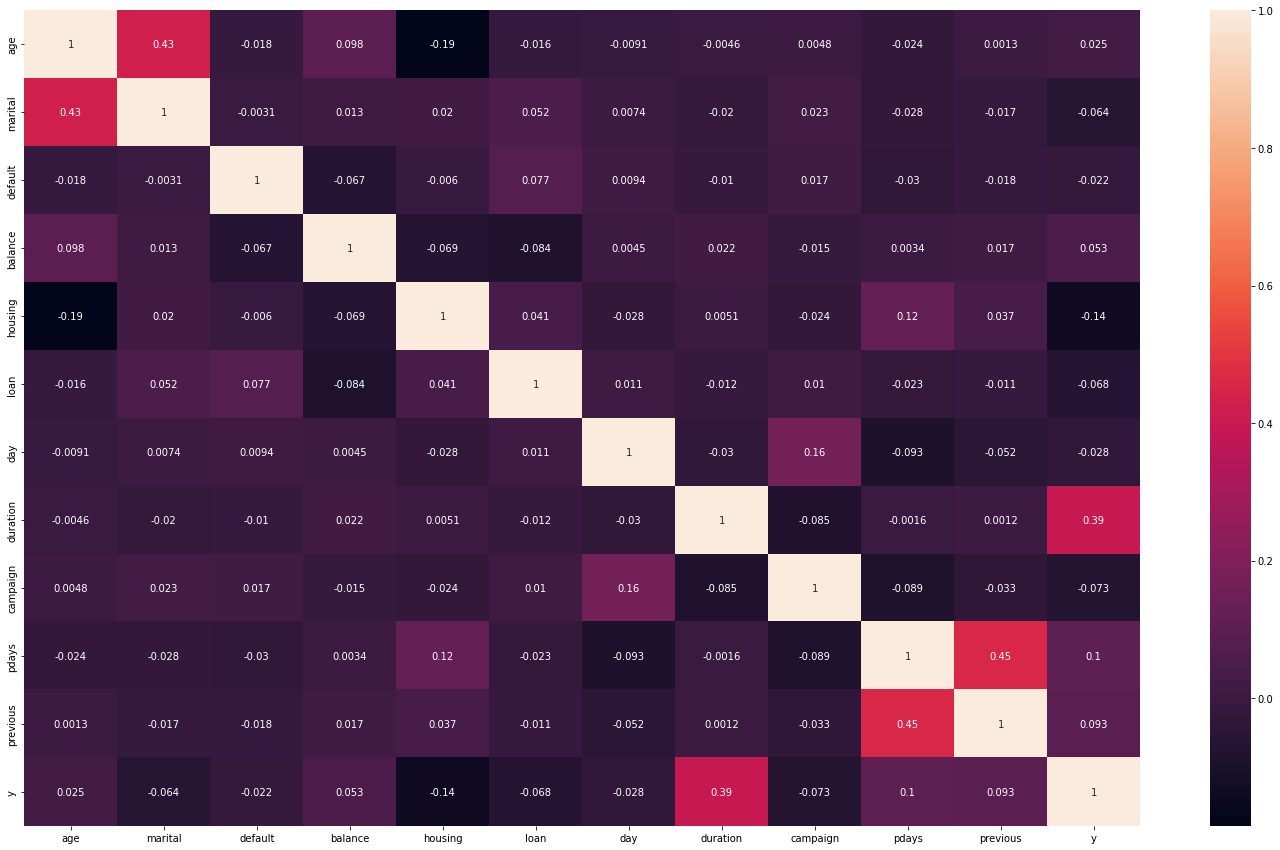

array(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y'], dtype=object)

In [125]:
#Display the Correlation matrix & Feature Selection
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()
df.columns.values

In [126]:
#Creating the Training Dataset 30% Test and 70% Training
from sklearn.model_selection import train_test_split
x=df.drop(['y'],axis=1)
y=df.y.values
#xtrain,xtest,ytrain,ytest=train_test_split(x, y , test_size=0.3 , random_state=10)

**Classifier / ML Model**

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.metrics import accuracy_score, auc, roc_auc_score,roc_curve,classification_report, confusion_matrix,f1_score 
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
MLList = []
ACCList = []

Confusion matrix:
[[11759   247]
 [ 1231   327]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.57      0.21      0.31      1558

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



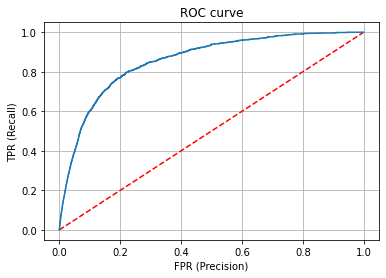

Area under curve (AUC):  0.8570352714100801


In [128]:
#Building the Logistic Regression model
log = LogisticRegression(max_iter=10000)
log.fit(xtrain, ytrain)
ypred_log=log.predict(xtest)

#Confusion matrix
print('Confusion matrix:')
print(confusion_matrix(ytest,ypred_log))
print('\n')

#CLASSIFICATION REPORT
print(classification_report(ytest, ypred_log))

#ROC, AUC
y_score_log=log.predict_proba(xtest)[:,1]

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

fpr,tpr,thresholds = roc_curve(ytest,y_score_log)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

MLList.append("Logistic Regression")
ACCList.append(log.score(xtest,ytest))

Training accuracy: 1.0
Testing accuracy : 0.8603656738425244
Confusion matrix:
[[11019   987]
 [  907   651]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12006
           1       0.40      0.42      0.41      1558

    accuracy                           0.86     13564
   macro avg       0.66      0.67      0.66     13564
weighted avg       0.86      0.86      0.86     13564



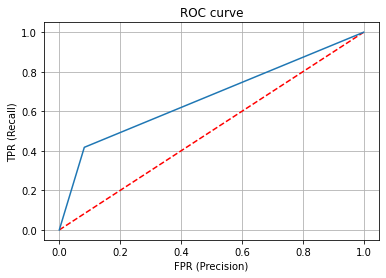

Area under curve (AUC):  0.6678172467039908


In [129]:
#Building the Decision Tree model
dt=DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)
ypred_dt=dt.predict(xtest)
print ('Training accuracy:',dt.score(xtrain,ytrain))
print ('Testing accuracy :',dt.score(xtest,ytest))

#Confusion matrix
print('Confusion matrix:')
print(confusion_matrix(ytest,ypred_dt))
print('\n')

#CLASSIFICATION REPORT
print(classification_report(ytest, ypred_dt))

#ROC, AUC
y_score=dt.predict_proba(xtest)[:,1]

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

fpr,tpr,thresholds = roc_curve(ytest,y_score)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

MLList.append("Decision Tree")
ACCList.append(dt.score(xtest,ytest))

Confusion matrix
 [[11544   462]
 [ 1119   439]]


              precision    recall  f1-score   support

           0       0.91      0.96      0.94     12006
           1       0.49      0.28      0.36      1558

    accuracy                           0.88     13564
   macro avg       0.70      0.62      0.65     13564
weighted avg       0.86      0.88      0.87     13564



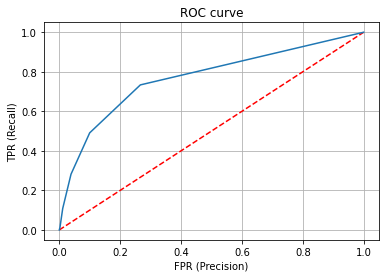

Area under curve (AUC):  0.7674716877761376


In [130]:
#Building the KNN model
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)

#Confusion matrix
conf_knn = confusion_matrix(ytest, ypred_knn)
print('Confusion matrix\n',conf_knn)
print('\n')

#CLASSIFICATION REPORT
print(classification_report(ytest, ypred_knn))

#ROC, AUC
y_score_knn = knn.predict_proba(xtest)[:,1]
fpr,tpr,thresholds = roc_curve(ytest, y_score_knn)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

MLList.append("KNN")
ACCList.append(knn.score(xtest,ytest))

Confusion matrix
 [[11149   857]
 [  917   641]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.93     12006
           1       0.43      0.41      0.42      1558

    accuracy                           0.87     13564
   macro avg       0.68      0.67      0.67     13564
weighted avg       0.87      0.87      0.87     13564



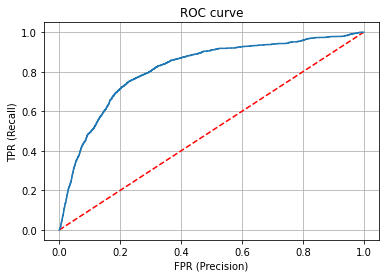

Area under curve (AUC):  0.8152877455153467


In [131]:
#Building the Naive Bayes Model
nbmodel = GaussianNB()
nbmodel.fit(xtrain, ytrain)
ypred_nb = nbmodel.predict(xtest)

#Confusion matrix
conf_nb = confusion_matrix(ytest, ypred_nb)
print('Confusion matrix\n',conf_nb)
print('\n')

#CLASSIFICATION REPORT
print(classification_report(ytest, ypred_nb))

#ROC, AUC
y_score_nb = nbmodel.predict_proba(xtest)[:,1]
fpr,tpr,thresholds = roc_curve(ytest,y_score_nb)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

MLList.append("Naive Bayes")
ACCList.append(nbmodel.score(xtest,ytest))

Confusion matrix
 [[11622   384]
 [ 1076   482]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12006
           1       0.56      0.31      0.40      1558

    accuracy                           0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564



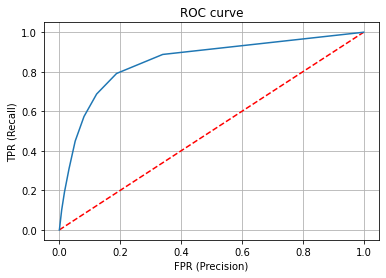

Area under curve (AUC):  0.8529759243185425


In [132]:
#Building the Random Forest Model
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(xtrain,ytrain)
ypred_clf = clf.predict(xtest)

#Confusion matrix
conf_clf = confusion_matrix(ytest, ypred_clf)
print('Confusion matrix\n',conf_clf)
print('\n')

#CLASSIFICATION REPORT
print(classification_report(ytest, ypred_clf))

#ROC, AUC
y_score_clf = clf.predict_proba(xtest)[:,1]
fpr,tpr,thresholds = roc_curve(ytest,y_score_clf)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

MLList.append("Random Forest")
ACCList.append(clf.score(xtest,ytest))

In [135]:
merged = zip(MLList, ACCList)
merged = list(merged)
Result = pd.DataFrame(merged, columns=['Model','Accuracy'])
Result

,Model,Accuracy
0,Logistic Regression,0.891035
1,Decision Tree,0.860366
2,KNN,0.883441
3,Naive Bayes,0.869213
4,Random Forest,0.892362


**Random Forest has the highest accuracy 0.892 and AUC 0.85**


In [ ]:
!jupyter nbconvert --to html fnce2431_m6_hw_Loan.ipynb
